<a href="https://colab.research.google.com/github/sakshi1989/Machine_Learning_Practices/blob/main/RandomForest_SVM_BostonDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Declaration of Libraries**###

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Read the data into the dataframe and drop the column - MEDV
dfSG = pd.read_csv("BostonHousing.csv", usecols= lambda col_name : col_name != 'MEDV')
dfSG.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,0


In [ ]:
dfSG.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,1.000000


In [ ]:
# Check the no. of unique values for the features
for col in dfSG.loc[:,~dfSG.columns.isin(['CAT. MEDV'])].columns:
  print(f'The count of unique values in {col} column are : {dfSG[col].nunique()}')

The count of unique values in CRIM column are : 504
The count of unique values in ZN column are : 26
The count of unique values in INDUS column are : 76
The count of unique values in CHAS column are : 2
The count of unique values in NOX column are : 81
The count of unique values in RM column are : 446
The count of unique values in AGE column are : 356
The count of unique values in DIS column are : 412
The count of unique values in RAD column are : 9
The count of unique values in TAX column are : 66
The count of unique values in PTRATIO column are : 46
The count of unique values in LSTAT column are : 455


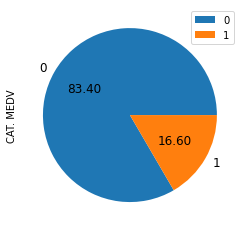

In [ ]:
# Check the class labels distribution
dfSG['CAT. MEDV'].value_counts().plot.pie(autopct='%.2f',legend=True,fontsize=12)

###**Partition the dataset**###

In [ ]:
# Independent Variables
rfX = dfSG.drop(columns = 'CAT. MEDV').copy()
# Response Variable
y = dfSG['CAT. MEDV'].copy()

# Partition the dataset into train & validation - as there is class imbalance we will use the stratify parameter to divide the labels 30% 
# from each class instead of pure random sampling
rftrain_XSG , rfval_XSG , rftrain_ySG , rfval_ySG  = train_test_split(rfX,y,test_size=0.3,random_state=0,stratify=y)

##**Random Forest**##

In [ ]:
# Random Forest without hypertuning the parameters
RFSG1 = RandomForestClassifier(random_state=0)
RFSG1.fit(rftrain_XSG,rftrain_ySG)

RandomForestClassifier(random_state=0)

In [ ]:
# Print the accuracy for both Training & Validation
print(f'Training accuracy is: {RFSG1.score(rftrain_XSG,rftrain_ySG)}')
print(f'Validation accuracy is : {RFSG1.score(rfval_XSG,rfval_ySG):.3f}')

Training accuracy is: 1.0
Validation accuracy is : 0.941


In [ ]:
# Hypertune the parameters using GridSearchCV
param_SG = {
    'n_estimators' : range(60,80,1),
    'max_features' : range(1,13,1),
    'max_depth' : range(1,5,1)
}

RFSG = RandomForestClassifier(random_state=0)
gridcv_SG = GridSearchCV(estimator = RFSG, param_grid=param_SG , cv=5 , verbose=2 , n_jobs=-1, return_train_score=True)
gridcv_SG.fit(rftrain_XSG,rftrain_ySG)

Fitting 5 folds for each of 880 candidates, totalling 4400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 5), 'max_features': range(1, 12),
                         'n_estimators': range(60, 80)},
             return_train_score=True, verbose=2)

In [ ]:
# List the best model parameters
gridcv_SG.best_params_

{'max_depth': 3, 'max_features': 3, 'n_estimators': 63}

In [ ]:
# Print the accuracy for both Training & Validation
print(f'Training accuracy is : {gridcv_SG.score(rftrain_XSG,rftrain_ySG) : .3f}')
print(f'Validation accuracy is : {gridcv_SG.score(rfval_XSG,rfval_ySG) : .3f}')

Training accuracy is :  0.983
Validation accuracy is :  0.941


In [ ]:
# The feature importance of hypertuned parameter RF model
final_model_SG = gridcv_SG.best_estimator_

feature_imp_SG = pd.Series(final_model_SG.feature_importances_ , index = rfX.columns).sort_values(ascending = False)

feature_imp_SG

RM         0.419515
LSTAT      0.241532
INDUS      0.087843
PTRATIO    0.077736
ZN         0.056029
NOX        0.030927
CRIM       0.028975
TAX        0.021588
DIS        0.014967
RAD        0.008699
AGE        0.008467
CHAS       0.003722
dtype: float64

##**Support Vector Machines**##

In [ ]:
# Independent Variables
svmX = dfSG.drop(columns = 'CAT. MEDV').copy()

svmX = StandardScaler().fit_transform(svmX)

# Partition the dataset into train & validation - as there is class imbalance we will use the stratify parameter to divide the labels 30% 
# from each class instead of pure random sampling
svm_train_XSG , svm_val_XSG , svm_train_ySG , svm_val_ySG  = train_test_split(svmX,y,test_size=0.3,random_state=0,stratify=y)

In [ ]:
# Linear kernel trick
linearSVM_SG = SVC(kernel='linear', random_state = 0)
linearSVM_SG.fit(svm_train_XSG,svm_train_ySG)

print(f'Accuracy on validation data : {linearSVM_SG.score(svm_val_XSG, svm_val_ySG) : .3f}')

Accuracy on validation data :  0.895


In [ ]:
# Radial basis function trick
radialSVM_SG = SVC(kernel='rbf', random_state=0)
radialSVM_SG.fit(svm_train_XSG,svm_train_ySG)

# Accuracy on validation data
print(f'Accuracy on validation data : {radialSVM_SG.score(svm_val_XSG, svm_val_ySG) : .3f}')

Accuracy on validation data :  0.928


In [ ]:
# Hypertuning of the parameters
svmparam_SG = {
    'C' : [0.1,0.5,1,10],
    'gamma' : [0.0001,0.001,0.01,0.1,1],
    'kernel' : ['rbf', 'linear']
}

# GridSearchCV to identify best param value and using it to fit the model on training data
SVM_SG = SVC(random_state=0)
svmgrid_SG = GridSearchCV(SVM_SG , param_grid=svmparam_SG, cv = 10, verbose = 3, n_jobs = -1)
svmgrid_SG.fit(svm_train_XSG, svm_train_ySG)

# Get the value of the parameter values
svmgrid_SG.best_params_

Fitting 10 folds for each of 40 candidates, totalling 400 fits


{'C': 0.5, 'gamma': 0.0001, 'kernel': 'linear'}

In [ ]:
# Accuracy on validation data
print(f'Accuracy on validation data : {svmgrid_SG.score(svm_val_XSG, svm_val_ySG) : .3f}')

Accuracy on validation data :  0.901
